# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
print(df)

       Col1      Col2      Col3      Col4
0 -0.233100  1.709130  0.276898  0.621136
1  1.892441 -0.768976  0.667318 -1.029246
2  1.032807 -0.512256 -0.129228  0.728234
3  1.306601 -0.036212  0.673072 -0.554152
4 -0.241136 -0.088774  0.827739 -1.289768
5 -0.329663 -0.192386  0.239123 -0.175719
6 -0.894422 -0.240312  1.224639  1.530099
7  0.189890 -0.423273 -0.008420  0.774403
8  0.924500  1.276614  0.716186  1.917201
9  0.325944  0.771744  1.035061 -0.368974


In [3]:
# 設定 data_path
dir_data = './data/'

In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [54]:
print(max(app_train['CNT_CHILDREN'].values))
print(min(app_train['CNT_CHILDREN'].values))
print(len(app_train['CNT_CHILDREN']))
print(sum(app_train['CNT_CHILDREN'] == 0))
print(sum(app_train['CNT_CHILDREN'] == 1))
print(sum(app_train['CNT_CHILDREN'] == 2))

19
0
307511
215371
61119
26749


In [6]:
#1 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
"""
Your code here
"""
cut_rule = pd.IntervalIndex.from_tuples([(-1, 0), (0, 2), (2, 5), (5, 19)])

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()


(-1, 0]    215371
(0, 2]      87868
(2, 5]       4230
(5, 19]        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [9]:
#2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP']
# app_train.groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL'].describe()
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL','TARGET']
grouped_df.mean()
grouped_df.describe()

AMT_INCOME_TOTAL                                         \
                              count           mean            std      min   
CNT_CHILDREN_GROUP                                                           
(-1, 0]                    215371.0  166288.713566  104700.345823  25650.0   
(0, 2]                      87868.0  174725.712648  411391.224507  26550.0   
(2, 5]                       4230.0  173626.303191  112929.960776  29250.0   
(5, 19]                        42.0  147910.714286   72786.394413  45000.0   

                                                                 TARGET  \
                         25%       50%       75%          max     count   
CNT_CHILDREN_GROUP                                                        
(-1, 0]             112500.0  144000.0  202500.0   13500000.0  215371.0   
(0, 2]              112500.0  157500.0  202500.0  117000000.0   87868.0   
(2, 5]              112500.0  148500.0  202500.0    2250000.0    4230.0   
(5, 19]             103500.0  126000.0  193500.0     337500.0      42.0   

                                                                 
                        mean       std  min  25%  50%  75%  max  
CNT_CHILDREN_GROUP                                               
(-1, 0]             0.077118  0.266779  0.0  0.0  0.0  0.0  1.0  
(0, 2]              0.088622  0.284198  0.0  0.0  0.0  0.0  1.0  
(2, 5]              0.099291  0.299087  0.0  0.0  0.0  0.0  1.0  
(5, 19]             0.214286  0.415300  0.0  0.0  0.0  0.0  1.0

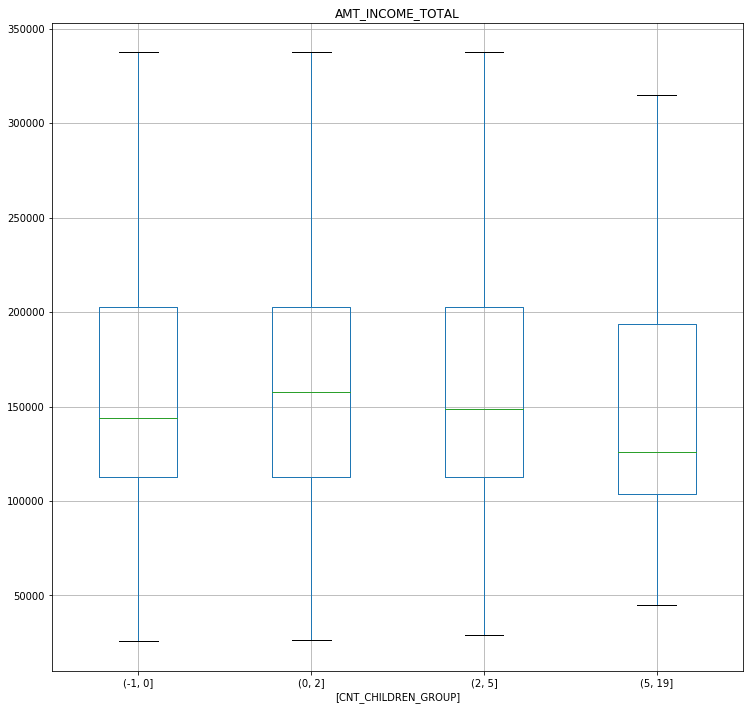

In [11]:
#2-2 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
Your code here
"""
# 放對應數值的 culumn
plt_column = ['AMT_INCOME_TOTAL']
# 放 graup 的 coulumn
plt_by = ['CNT_CHILDREN_GROUP']

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
# boxplot解釋
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [13]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
"""
Your code here
"""

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: ( x - np.mean(x) ) / ( np.std(x) ))['AMT_INCOME_TOTAL']

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345857
1,270000.0,0.990556
2,67500.0,-0.943540
3,135000.0,-0.298841
4,121500.0,-0.427781
